# Comparison of Learning Rates for Batch Gradient Descent

This notebook displays an animation comparing a good learning rate with one that is too high and one that is too low in batch gradient descent (introduced in Chapter 4). Thanks to [Daniel Ingram](https://github.com/daniel-s-ingram) who contributed this notebook.

In [1]:
from __future__ import print_function, division, unicode_literals
import numpy as np

%matplotlib nbagg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
m = 100
X = 2*np.random.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X]
y = 4 + 3*X + np.random.rand(m, 1)

low_learning_rate = 0.005
good_learning_rate = 0.05
high_learning_rate = 0.5

In [3]:
def batch_gradient_descent(learning_rate):
    n_iterations = 1000
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    for i in range(n_iterations):
        gradients = 2*X_b.T.dot(X_b.dot(thetas) - y)/m
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

    return thetas_path

In [4]:
def compute_mse(theta):
    return np.sum((np.dot(X_b, theta) - y)**2)/m

In [5]:
theta0, theta1 = np.meshgrid(np.arange(3, 6.01, 0.01), np.arange(1.5, 4.51, 0.01))
r, c = theta0.shape
cost_map = np.array([[0 for _ in range(c)] for _ in range(r)])
for i in range(r):
    for j in range(c):
        theta = np.array([theta0[i,j], theta1[i,j]])
        cost_map[i,j] = compute_mse(theta)

In [6]:
exact_solution = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
low_thetas = np.array(batch_gradient_descent(low_learning_rate))
good_thetas = np.array(batch_gradient_descent(good_learning_rate))
high_thetas = np.array(batch_gradient_descent(high_learning_rate))

In [7]:
low_len = len(low_thetas)
med_len = len(good_thetas)
high_len = len(high_thetas)
n_iter = min(low_len, med_len, high_len)

<IPython.core.display.Javascript object>


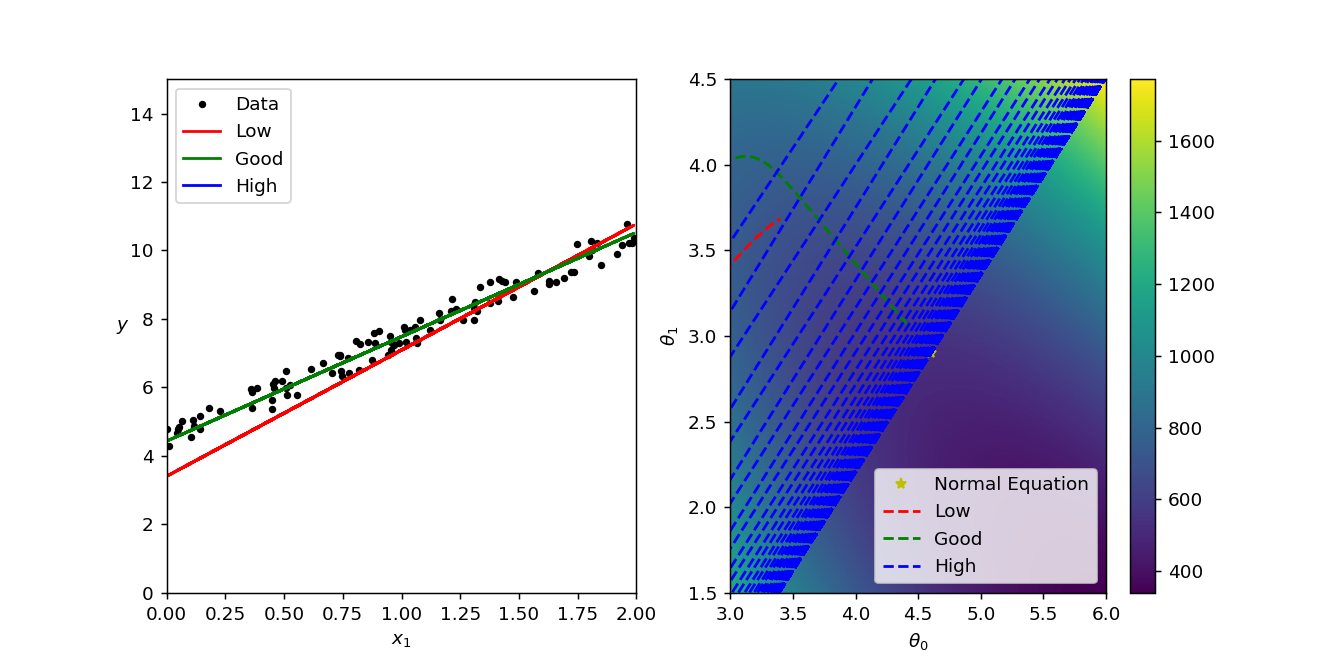

In [8]:
fig = plt.figure(figsize=(10, 5))
data_ax = fig.add_subplot(121)
cost_ax = fig.add_subplot(122)

data_pts, = data_ax.plot(X, y, 'k.')
low_fit, = data_ax.plot(X, X_b.dot(low_thetas[0,:]), 'r-')
good_fit, = data_ax.plot(X, X_b.dot(good_thetas[0,:]), 'g-')
high_fit, = data_ax.plot(X, X_b.dot(high_thetas[0,:]), 'b-')

solution_pt, = cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')
cost_img = cost_ax.pcolor(theta0, theta1, cost_map)
low_path, = cost_ax.plot([low_thetas[0, 0]], [low_thetas[0, 1]], 'r--')
good_path, = cost_ax.plot([good_thetas[0, 0]], [good_thetas[0, 1]], 'g--')
high_path, = cost_ax.plot([high_thetas[0, 0]], [high_thetas[0, 1]], 'b--')
fig.colorbar(cost_img)

In [9]:
def init():
    data_ax.set_xlim([0, 2])
    data_ax.set_ylim([0, 15])
    cost_ax.set_xlim([3, 6])
    cost_ax.set_ylim([1.5, 4.5])
    data_ax.set_xlabel(r'$x_1$')
    data_ax.set_ylabel(r'$y$', rotation=0)
    cost_ax.set_xlabel(r'$\theta_0$')
    cost_ax.set_ylabel(r'$\theta_1$')
    data_ax.legend(('Data', 'Low', 'Good', 'High'), loc="upper left")
    cost_ax.legend(('Normal Equation', 'Low', 'Good', 'High'), loc="lower right")
    return (data_pts, solution_pt, cost_img,
            low_fit, good_fit, high_fit,
            low_path, good_path, high_path)

In [10]:
def animate(i):
    low_fit.set_ydata([X_b.dot(low_thetas[i,:])])
    low_path.set_data([low_thetas[:i,0], low_thetas[:i,1]])
    good_fit.set_ydata([X_b.dot(good_thetas[i,:])])
    good_path.set_data([good_thetas[:i,0], good_thetas[:i,1]])
    high_fit.set_ydata([X_b.dot(high_thetas[i,:])])
    high_path.set_data([high_thetas[:i,0], high_thetas[:i,1]])
    return (low_fit, good_fit, high_fit,
            low_path, good_path, high_path)

In [11]:
animation = FuncAnimation(fig, animate, frames=n_iter, init_func=init, interval=20)
plt.show()
#animation.save("learning_rate_comparison.gif", writer="imagemagick")